# 📊 Analyse et Visualisation des Données des Cours

Ce notebook présente une analyse complète du dataset des cours (`final_data.csv`).
Nous utiliserons **Matplotlib** pour des visualisations claires et professionnelles afin de mieux comprendre la distribution des données pour notre système de recommandation.

### Objectifs de l'analyse :
1. Distribution des cours par catégorie
2. Analyse des notes (Ratings)
3. Relation entre popularité et notes
4. Top 10 des partenaires (institutions)
5. Distribution des niveaux de difficulté
6. Durée des cours par catégorie
7. Répartition par domaine source

In [14]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import warnings

# Configuration de matplotlib pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-darkgrid')  # Style moderne
plt.rcParams['figure.figsize'] = (12, 6)  # Taille par défaut
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

warnings.filterwarnings('ignore')

## 1. Chargement et Aperçu des Données

In [15]:
# Chargement du fichier CSV
try:
    # Chemin relatif depuis le dossier notebooks/
    df = pd.read_csv('../processed_data/final_courses_shuffled.csv')
    print("✅ Données chargées avec succès !")
except FileNotFoundError:
    try:
        # Fallback 1: Si exécuté depuis la racine
        df = pd.read_csv('final_data/final_data.csv')
        print("✅ Données chargées avec succès (chemin racine) !")
    except FileNotFoundError:
        print("❌ Fichier non trouvé. Vérifiez le chemin.")

# Conversion des colonnes si nécessaire
if 'scraped_at' in df.columns:
    df['scraped_at'] = pd.to_datetime(df['scraped_at'])

# Affichage des premières lignes
df.head()

✅ Données chargées avec succès !


,title,partner,rating,reviews,metadata,link,category,scraped_at,source_domain,num_ratings,duration_hours,level_enc,title_clean,popularity_score,id,price
0,Mastering Artificial Intelligence,Selfcode Academy,4.4,416 reviews,All Levels · Course,https://www.udemy.com/course/mastering-artific...,General,2026-02-02 20:24:47.830773,udemy,416,12.5,0,mastering artificial intelligence,26.545579,582,$9.99
1,Capstone Project: Digital Marketing and Growth...,IBM,0.0,0 reviews,Advanced · Course · 1 - 3 Months,https://www.coursera.org/learn/capstone-projec...,Digital Marketing,2026-01-29 02:34:11.841793,coursera,0,20.0,3,capstone project digital marketing and growth ...,0.000000,1244,Inscrivez-vous gratuitement
2,The Art of Visual Storytelling,University of Colorado Boulder,4.6,135 reviews,Beginner · Specialization · 3 - 6 Months,https://www.coursera.org/specializations/the-a...,Video Editing,2026-01-28 23:15:44.255610,coursera,135,20.0,1,the art of visual storytelling,22.598212,1094,Inscrivez-vous gratuitement
3,Meta Social Media Marketing,Meta,4.8,23K reviews,Beginner · Professional Certificate · 3 - 6 Mo...,https://www.coursera.org/professional-certific...,Digital Marketing,2026-01-28 23:13:38.659416,coursera,23000,20.0,1,meta social media marketing,48.207806,916,Inscrivez-vous gratuitement
4,Python for OOP - The A to Z OOP Python Program...,Packt,0.0,0 reviews,Intermediate · Course · 1 - 3 Months,https://www.coursera.org/learn/packt-python-fo...,Data Science,2026-02-02 19:39:49.373141,coursera,0,20.0,2,python for oop the a to z oop python programm...,0.000000,70,Inscrivez-vous gratuitement


In [16]:
# Informations générales sur le dataset
print(f"Nombre de cours: {len(df)}")
print(f"Nombre de colonnes: {len(df.columns)}")
print(f"\nColonnes disponibles:")
df.info()

Nombre de cours: 1855
Nombre de colonnes: 16

Colonnes disponibles:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             1855 non-null   object        
 1   partner           1855 non-null   object        
 2   rating            1855 non-null   float64       
 3   reviews           1855 non-null   object        
 4   metadata          1855 non-null   object        
 5   link              1855 non-null   object        
 6   category          1855 non-null   object        
 7   scraped_at        1855 non-null   datetime64[ns]
 8   source_domain     1855 non-null   object        
 9   num_ratings       1855 non-null   int64         
 10  duration_hours    1855 non-null   float64       
 11  level_enc         1855 non-null   int64         
 12  title_clean       1855 non-null   object        
 13  popularity

## 2. Distribution des Catégories
Quelles sont les thématiques les plus représentées dans notre catalogue ?

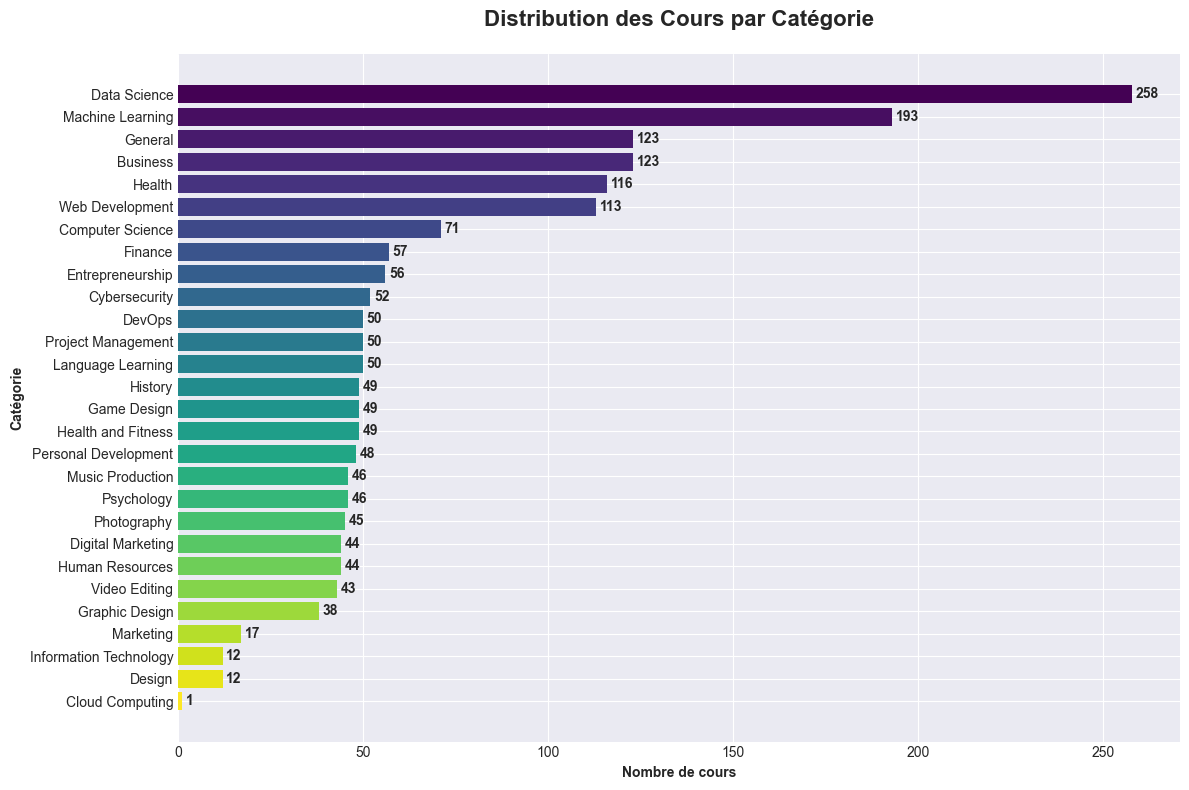


📊 Catégorie la plus populaire: Data Science (258 cours)


In [17]:
# Compter les cours par catégorie
category_counts = df['category'].value_counts()

# Créer le graphique en barres horizontales
fig, ax = plt.subplots(figsize=(12, 8))

# Utiliser un dégradé de couleurs
colors = cm.viridis(np.linspace(0, 1, len(category_counts)))

# Créer le graphique
bars = ax.barh(range(len(category_counts)), category_counts.values, color=colors)
ax.set_yticks(range(len(category_counts)))
ax.set_yticklabels(category_counts.index)
ax.set_xlabel('Nombre de cours', fontweight='bold')
ax.set_ylabel('Catégorie', fontweight='bold')
ax.set_title('Distribution des Cours par Catégorie', fontsize=16, fontweight='bold', pad=20)

# Ajouter les valeurs sur les barres
for i, (bar, value) in enumerate(zip(bars, category_counts.values)):
    ax.text(value + 1, i, str(value), va='center', fontweight='bold')

# Inverser l'axe Y pour avoir la catégorie la plus populaire en haut
ax.invert_yaxis()

plt.tight_layout()
plt.show()

print(f"\n📊 Catégorie la plus populaire: {category_counts.index[0]} ({category_counts.values[0]} cours)")

## 3. Analyse des Notes (Ratings)
Comment sont distribuées les notes des cours ?

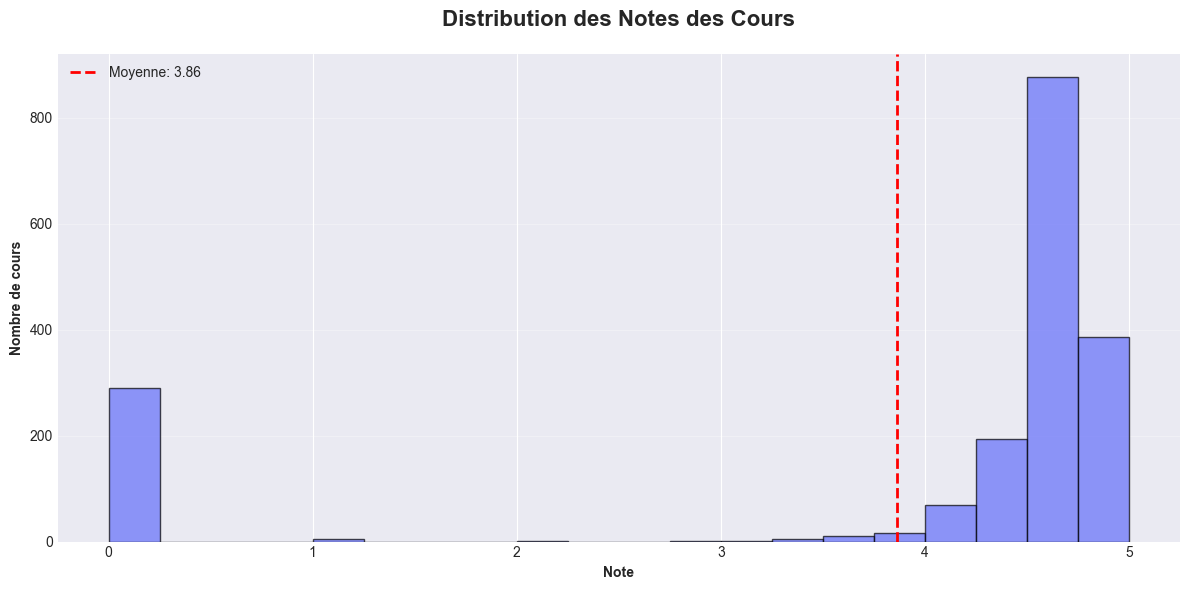


📊 Statistiques des notes:
  - Moyenne: 3.86
  - Médiane: 4.60
  - Écart-type: 1.69
  - Min: 0.00
  - Max: 5.00


In [18]:
# Créer un histogramme des notes
fig, ax = plt.subplots(figsize=(12, 6))

# Histogramme avec style
n, bins, patches = ax.hist(df['rating'], bins=20, color='#636EFA', edgecolor='black', alpha=0.7)

# Ajouter une ligne de moyenne
mean_rating = df['rating'].mean()
ax.axvline(mean_rating, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_rating:.2f}')

ax.set_xlabel('Note', fontweight='bold')
ax.set_ylabel('Nombre de cours', fontweight='bold')
ax.set_title('Distribution des Notes des Cours', fontsize=16, fontweight='bold', pad=20)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Statistiques des notes:")
print(f"  - Moyenne: {df['rating'].mean():.2f}")
print(f"  - Médiane: {df['rating'].median():.2f}")
print(f"  - Écart-type: {df['rating'].std():.2f}")
print(f"  - Min: {df['rating'].min():.2f}")
print(f"  - Max: {df['rating'].max():.2f}")

## 4. Relation entre Popularité et Notes
Les cours populaires sont-ils mieux notés ?

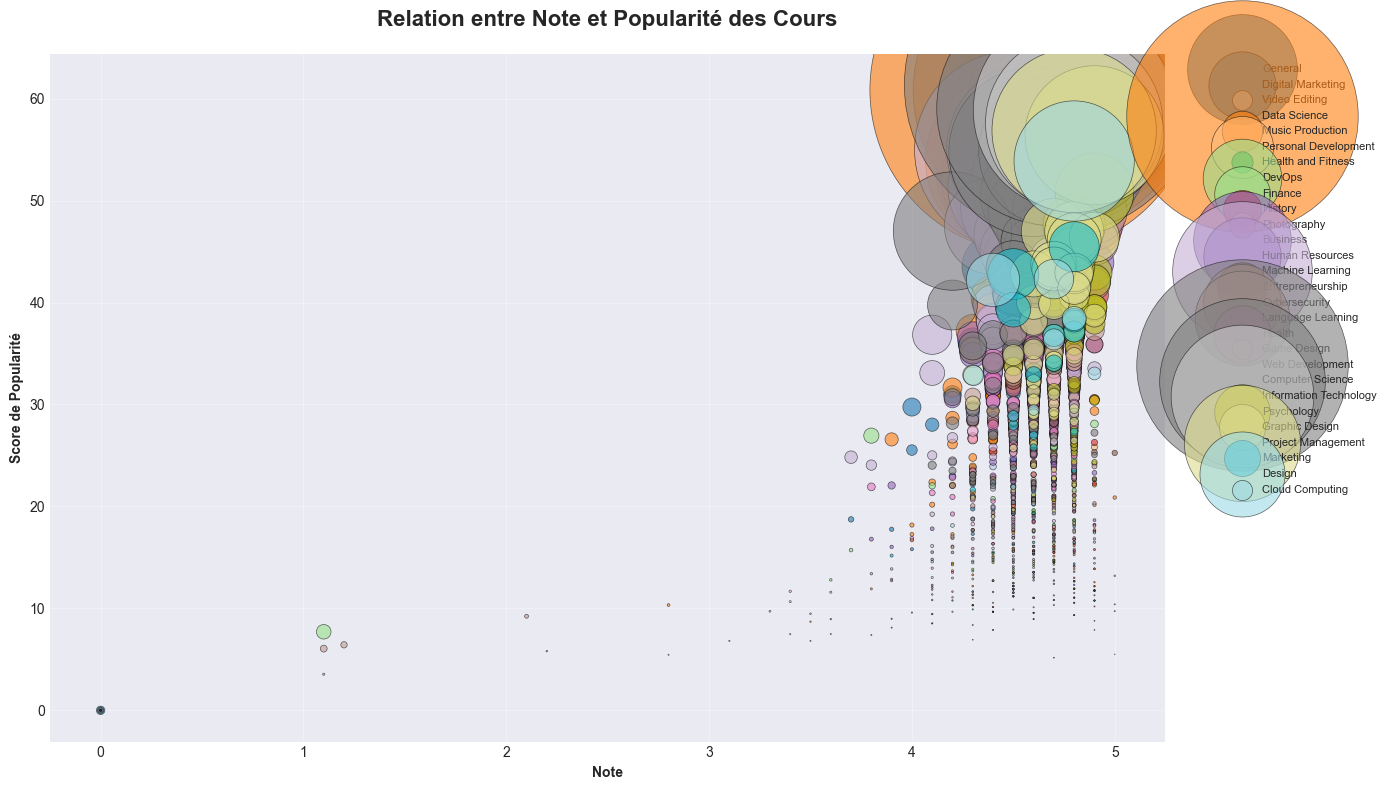


📊 Corrélation entre note et popularité: 0.726


In [19]:
# Créer un scatter plot
fig, ax = plt.subplots(figsize=(14, 8))

# Obtenir les catégories uniques et leur assigner des couleurs
categories = df['category'].unique()
colors_map = cm.tab20(np.linspace(0, 1, len(categories)))
category_colors = {cat: colors_map[i] for i, cat in enumerate(categories)}

# Créer le scatter plot par catégorie
for category in categories:
    mask = df['category'] == category
    ax.scatter(df[mask]['rating'], 
              df[mask]['popularity_score'],
              s=df[mask]['num_ratings']/10,  # Taille basée sur le nombre de ratings
              alpha=0.6,
              c=[category_colors[category]],
              label=category,
              edgecolors='black',
              linewidth=0.5)

ax.set_xlabel('Note', fontweight='bold')
ax.set_ylabel('Score de Popularité', fontweight='bold')
ax.set_title('Relation entre Note et Popularité des Cours', fontsize=16, fontweight='bold', pad=20)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calculer la corrélation
correlation = df['rating'].corr(df['popularity_score'])
print(f"\n📊 Corrélation entre note et popularité: {correlation:.3f}")

## 5. Top 10 des Partenaires (Institutions)
Quelles institutions proposent le plus de cours ?

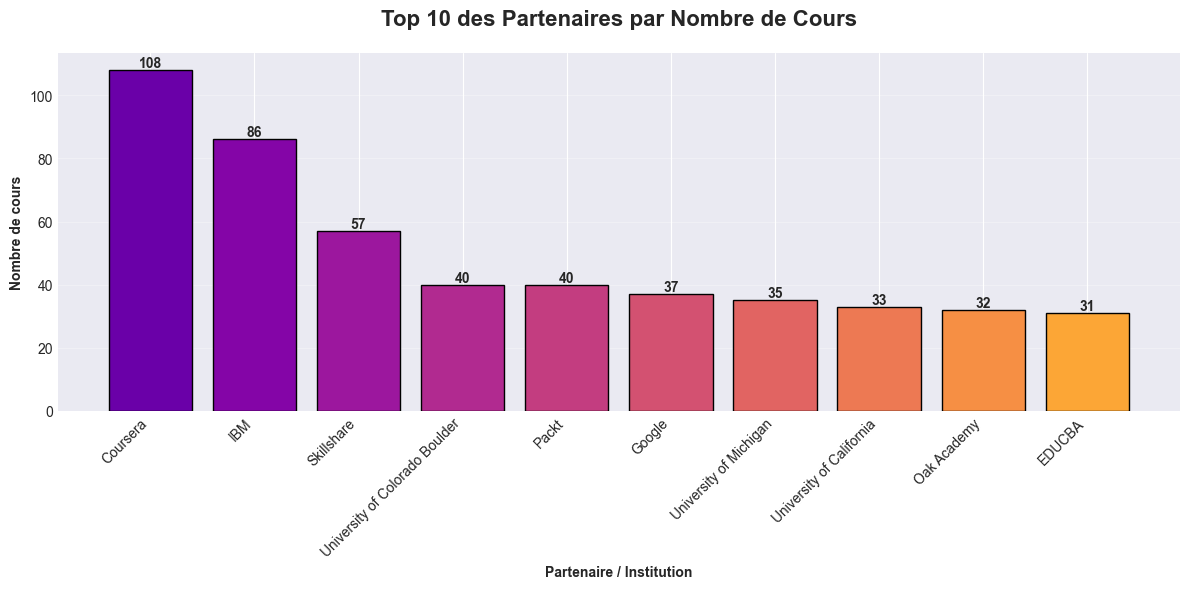


📊 Top 3 des partenaires:
  1. Coursera: 108 cours
  2. IBM: 86 cours
  3. Skillshare: 57 cours


In [20]:
# Top 10 des partenaires
partner_counts = df['partner'].value_counts().nlargest(10)

# Créer le graphique en barres
fig, ax = plt.subplots(figsize=(12, 6))

colors = cm.plasma(np.linspace(0.2, 0.8, len(partner_counts)))
bars = ax.bar(range(len(partner_counts)), partner_counts.values, color=colors, edgecolor='black')

ax.set_xticks(range(len(partner_counts)))
ax.set_xticklabels(partner_counts.index, rotation=45, ha='right')
ax.set_xlabel('Partenaire / Institution', fontweight='bold')
ax.set_ylabel('Nombre de cours', fontweight='bold')
ax.set_title('Top 10 des Partenaires par Nombre de Cours', fontsize=16, fontweight='bold', pad=20)

# Ajouter les valeurs sur les barres
for bar, value in zip(bars, partner_counts.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{int(value)}',
           ha='center', va='bottom', fontweight='bold')

ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Top 3 des partenaires:")
for i, (partner, count) in enumerate(partner_counts.head(3).items(), 1):
    print(f"  {i}. {partner}: {count} cours")

## 6. Distribution des Niveaux de Difficulté
Comment sont répartis les cours selon leur niveau ?

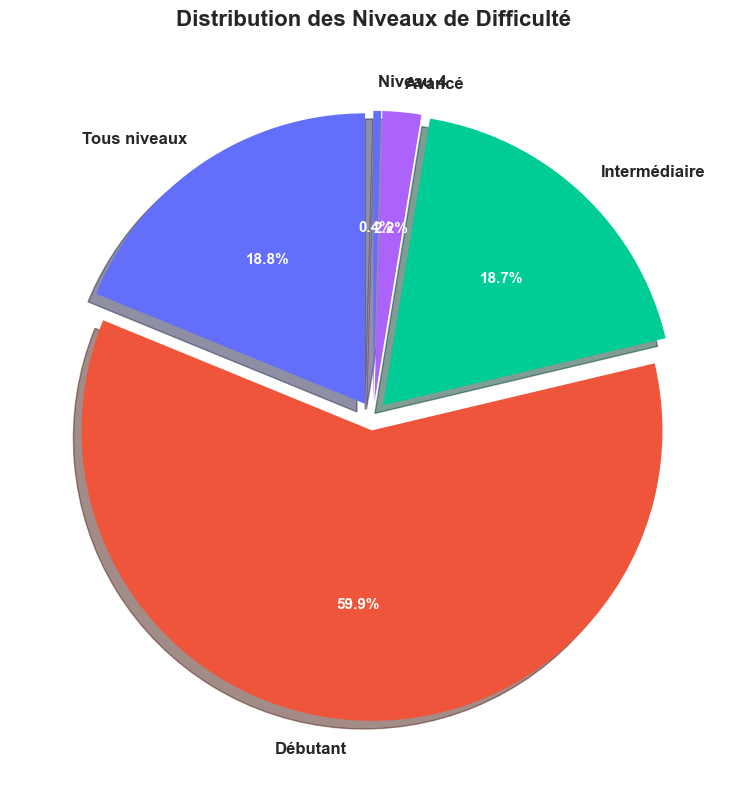


📊 Répartition par niveau:
  - Tous niveaux: 349 cours (18.8%)
  - Débutant: 1111 cours (59.9%)
  - Intermédiaire: 347 cours (18.7%)
  - Avancé: 40 cours (2.2%)
  - Niveau 4: 8 cours (0.4%)


In [21]:
# Mapping des niveaux encodés
level_mapping = {
    0: 'Tous niveaux',
    1: 'Débutant',
    2: 'Intermédiaire',
    3: 'Avancé'
}

# Compter les cours par niveau
level_counts = df['level_enc'].value_counts().sort_index()
level_labels = [level_mapping.get(level, f'Niveau {level}') for level in level_counts.index]

# Créer un diagramme circulaire (pie chart)
fig, ax = plt.subplots(figsize=(10, 8))

colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA']
explode = [0.05] * len(level_counts)  # Séparer légèrement les parts

wedges, texts, autotexts = ax.pie(level_counts.values, 
                                    labels=level_labels,
                                    autopct='%1.1f%%',
                                    colors=colors[:len(level_counts)],
                                    explode=explode,
                                    shadow=True,
                                    startangle=90)

# Améliorer le style du texte
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

ax.set_title('Distribution des Niveaux de Difficulté', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print(f"\n📊 Répartition par niveau:")
for level, count in level_counts.items():
    print(f"  - {level_mapping.get(level, f'Niveau {level}')}: {count} cours ({count/len(df)*100:.1f}%)")

## 7. Durée des Cours par Catégorie
Quelle est la durée typique des cours dans chaque catégorie ?

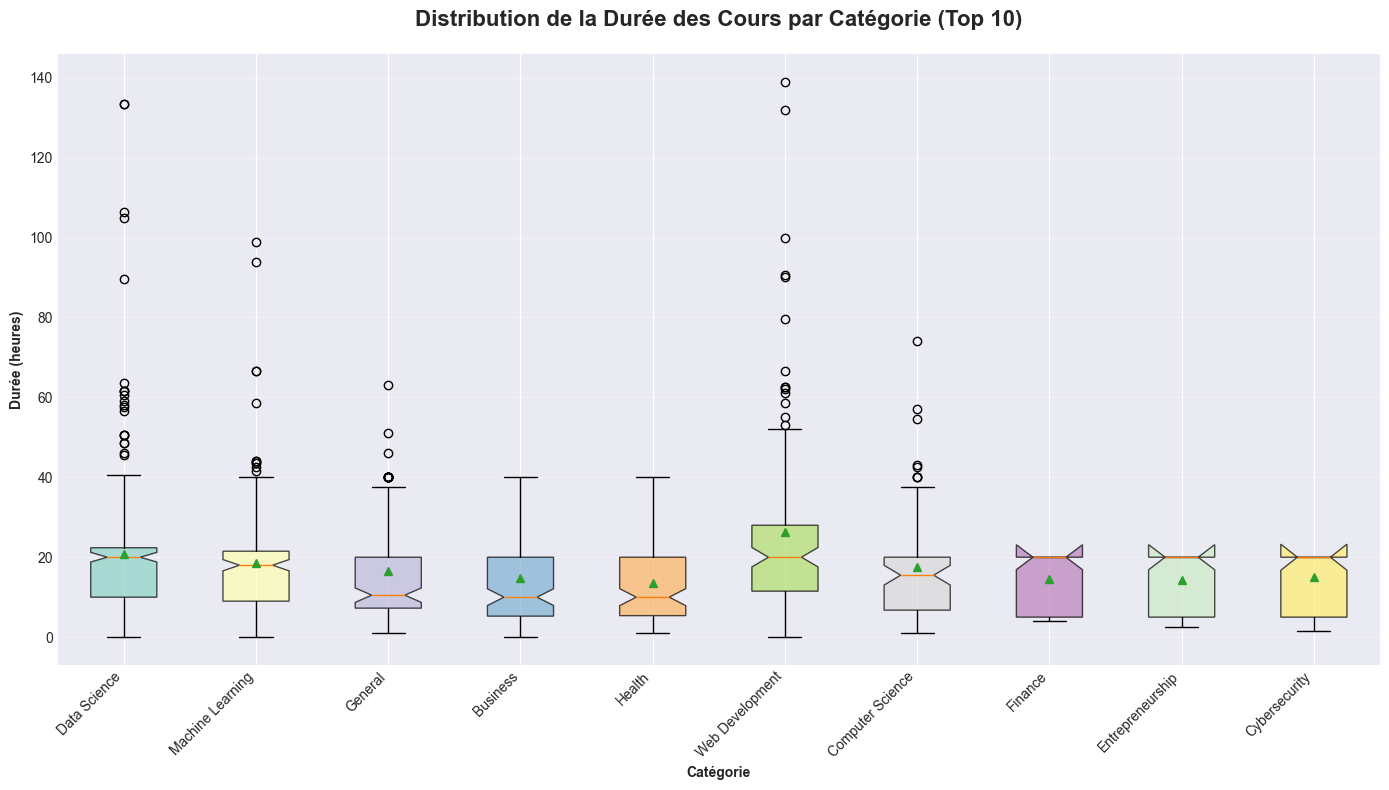


📊 Durée moyenne par catégorie (Top 5):
  - Data Science: 20.9 heures
  - Machine Learning: 18.6 heures
  - General: 16.6 heures
  - Business: 14.9 heures
  - Health: 13.6 heures


In [22]:
# Sélectionner les catégories principales (top 10)
top_categories = df['category'].value_counts().nlargest(10).index
df_top = df[df['category'].isin(top_categories)]

# Créer un box plot
fig, ax = plt.subplots(figsize=(14, 8))

# Préparer les données pour le boxplot
data_to_plot = [df_top[df_top['category'] == cat]['duration_hours'].values 
                for cat in top_categories]

# Créer le boxplot
bp = ax.boxplot(data_to_plot, 
                labels=top_categories,
                patch_artist=True,
                notch=True,
                showmeans=True)

# Colorer les boîtes
colors = cm.Set3(np.linspace(0, 1, len(top_categories)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_xlabel('Catégorie', fontweight='bold')
ax.set_ylabel('Durée (heures)', fontweight='bold')
ax.set_title('Distribution de la Durée des Cours par Catégorie (Top 10)', 
            fontsize=16, fontweight='bold', pad=20)
ax.set_xticklabels(top_categories, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Durée moyenne par catégorie (Top 5):")
for cat in top_categories[:5]:
    mean_duration = df_top[df_top['category'] == cat]['duration_hours'].mean()
    print(f"  - {cat}: {mean_duration:.1f} heures")

## 8. Répartition par Domaine Source
D'où proviennent nos cours ?

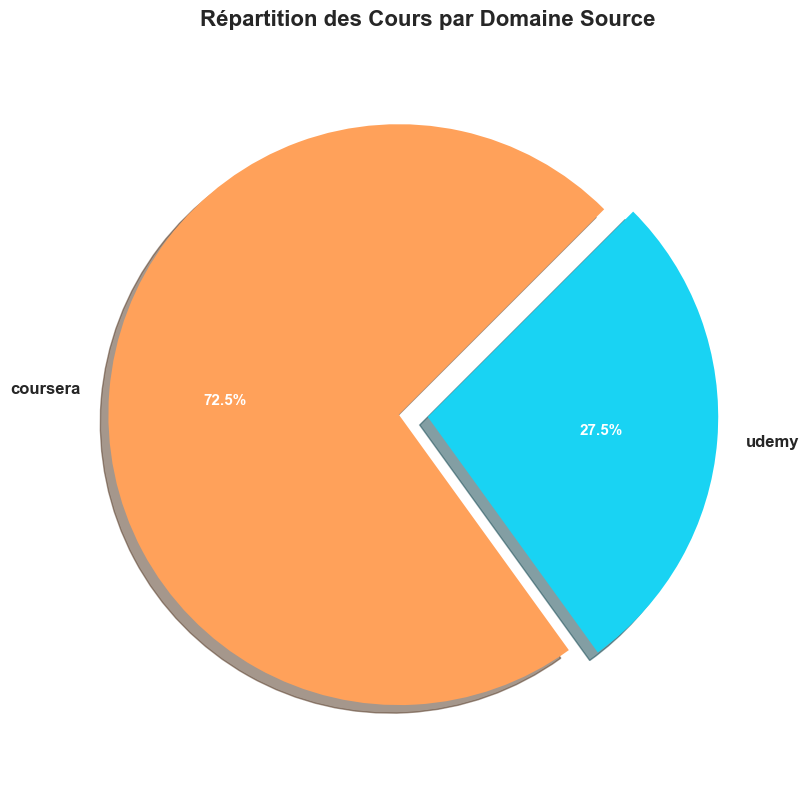


📊 Répartition par source:
  - coursera: 1344 cours (72.5%)
  - udemy: 511 cours (27.5%)


In [23]:
# Compter les cours par source
source_counts = df['source_domain'].value_counts()

# Créer un diagramme circulaire
fig, ax = plt.subplots(figsize=(10, 8))

colors = ['#FFA15A', '#19D3F3', '#FF6692', '#B6E880']
explode = [0.1 if i == 0 else 0 for i in range(len(source_counts))]  # Mettre en évidence la source principale

wedges, texts, autotexts = ax.pie(source_counts.values,
                                    labels=source_counts.index,
                                    autopct='%1.1f%%',
                                    colors=colors[:len(source_counts)],
                                    explode=explode,
                                    shadow=True,
                                    startangle=45)

# Améliorer le style
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

ax.set_title('Répartition des Cours par Domaine Source', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print(f"\n📊 Répartition par source:")
for source, count in source_counts.items():
    print(f"  - {source}: {count} cours ({count/len(df)*100:.1f}%)")

## 9. Résumé et Conclusions

### Points clés de l'analyse :

1. **Catégories** : Les cours sont diversifiés avec une dominance de certaines catégories techniques
2. **Notes** : La majorité des cours ont des notes élevées, indiquant une bonne qualité générale
3. **Popularité** : Il existe une corrélation entre les notes et la popularité des cours
4. **Partenaires** : Quelques institutions dominent le catalogue
5. **Niveaux** : Bonne répartition entre les différents niveaux de difficulté
6. **Durée** : Variation significative selon les catégories
7. **Sources** : Diversité des plateformes d'origine

### Implications pour le système de recommandation :

- **Diversité** : Le catalogue offre une bonne variété pour des recommandations personnalisées
- **Qualité** : Les notes élevées facilitent la recommandation de cours de qualité
- **Segmentation** : Les différents niveaux permettent d'adapter les recommandations au profil de l'utilisateur
- **Équilibre** : Nécessité de balancer entre popularité et découverte de nouveaux cours